# Isotonic Regression Example

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html#sphx-glr-auto-examples-miscellaneous-plot-isotonic-regression-py

In [1]:
# Original Authors: The scikit-learn developers

import numpy as np
from matplotlib.collections import LineCollection

from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state

n = 30
x = np.arange(n)
rs = check_random_state(0)
y = rs.randint(-50, 50, size=(n,)) + 50.0 * np.log1p(np.arange(n))

ir = IsotonicRegression(out_of_bounds="clip")
y_ = ir.fit_transform(x, y)

# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(x[:, np.newaxis], y)  # x needs to be 2d for LinearRegression

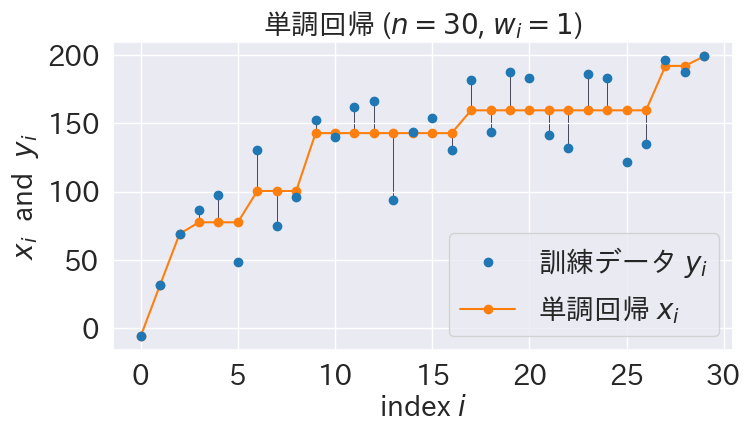

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import japanize_matplotlib

sns.set_context("notebook")
sns.set_style("darkgrid")

# font size
plt.rcParams.update({"font.size": 20})
plt.rcParams.update({"axes.titlesize": 20})
plt.rcParams.update({"axes.labelsize": 20})
plt.rcParams.update({"xtick.labelsize": 20})
plt.rcParams.update({"ytick.labelsize": 20})
plt.rcParams.update({"legend.fontsize": 20})
plt.rcParams.update({"figure.titlesize": 20})

# tex
# plt.rcParams.update({"text.usetex": True})
# plt.rcParams.update({"font.family": "serif"})

japanize_matplotlib.japanize()

segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig, ax0 = plt.subplots(figsize=(8, 4))

ax0.plot(x, y, "C0.", markersize=12, zorder=3)
ax0.plot(x, y_, "C1.-", markersize=12)
# ax0.plot(x, lr.predict(x[:, np.newaxis]), "C2-")
ax0.add_collection(lc)
ax0.legend(("訓練データ $y_i$", "単調回帰 $x_i$"), loc="lower right")
ax0.set_title(f"単調回帰 ($n={n}$, $w_i=1$)")

ax0.set_xlabel("index $i$")
ax0.set_ylabel("$x_i$  and  $y_i$")

# plt.show()
plt.savefig(os.path.join(os.getcwd(), "scipy_IR.png"), bbox_inches="tight", dpi=300)